### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [115]:
data = pd.read_csv('data/coupons.csv')

In [116]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [117]:
#INFO CELL
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

<b>Observations:</b>

-There are 25 columns in the dataset. 24 attributes & 1 output column.

-Total of 12,684 rows of data.

-The following columns have missing values:

    1. Car
    2. Bar
    3. CoffeeHouse
    4. CarryAway
    5. RestaurantLessThan20
    6. Restaurant20To50

# Dealing with missing data
<br>

## 1.Car

Since the car column effectively has very little data 108 rows out of 12,684 we can drop this column.

In [118]:
data = data.drop('car',axis=1)

## 2. Bar

<AxesSubplot:xlabel='Bar', ylabel='Count'>

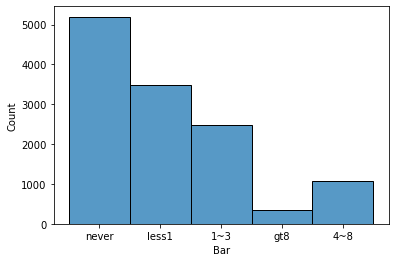

In [119]:
# dealing with the missing values in the Bar column 

#Drawing a histogram to see the distribution of the categorical variable 'Bar'
sns.histplot(data,x='Bar')

## 3. CoffeeHouse

In [120]:
data['CoffeeHouse'].value_counts()

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: CoffeeHouse, dtype: int64

## 4. CarryAway

In [121]:
data['CarryAway'].value_counts()

1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: CarryAway, dtype: int64

## 5. RestaurantLessThan20

In [122]:
data['RestaurantLessThan20'].value_counts()

1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: RestaurantLessThan20, dtype: int64

## 6. Restaurant20To50

In [123]:
data['Restaurant20To50'].value_counts()

less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: Restaurant20To50, dtype: int64

# Handling Missing data 

3. Decide what to do about your missing data -- drop, replace, other...

In [124]:
#For this exercise I have decided to drop the rows in the Data which had missing values.
data_clean = data.dropna(axis=0).reset_index(drop=True)
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [125]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null

We lost 605 rows while removing the missing null values. 

4. What proportion of the total observations chose to accept the coupon? 



In [126]:
round(len(data_clean[data_clean['Y'] == 1].index)/len(data_clean.index) * 100, 2)

56.93

### 56.93 % of the people chose to accept the coupon.

5. Use a bar plot to visualize the `coupon` column.

6. Use a histogram to visualize the temperature column.

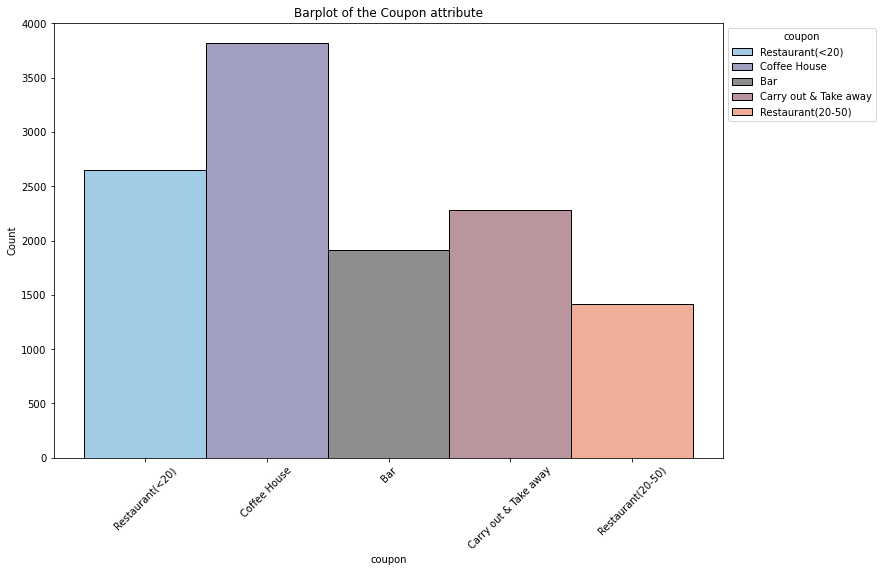

In [127]:
#Plotting Coupon
plt.figure(figsize=(12,8))
plt.xticks(rotation = 45)
plt.title('Barplot of the Coupon attribute')
plot = sns.histplot(data = data_clean,x='coupon',hue='coupon',palette='icefire')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1));

In [128]:
#Converting temparature to a categorical variable.
data_clean['temperature'] = data_clean['temperature'].astype('string')

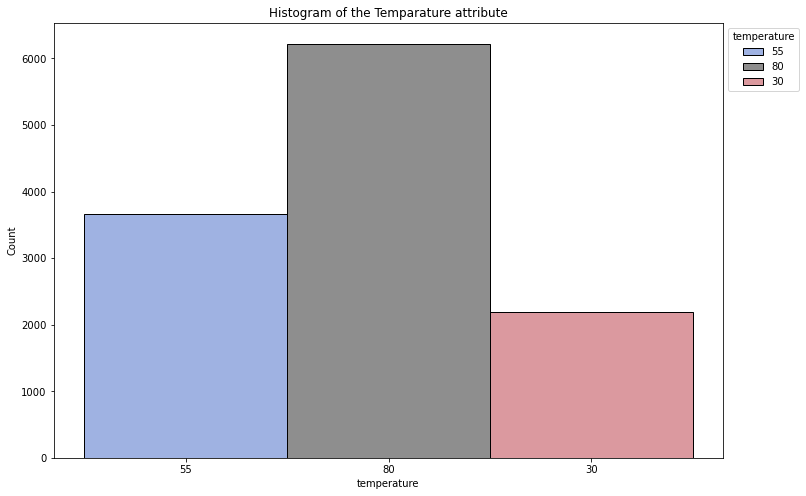

In [129]:
#plotting Temparature
plt.figure(figsize=(12,8))
#plt.xticks(rotation = 45)
plt.title('Histogram of the Temparature attribute')
plot = sns.histplot(data = data_clean,x='temperature',hue='temperature',palette = 'icefire')
sns.move_legend(plot, "upper left", bbox_to_anchor=(1, 1));

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [130]:
#df_bar contains all the data where the coupons displayed are related to bars.
df_bar = data_clean[data_clean['coupon'] == 'Bar']
df_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
13,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [131]:
#Same formula with coupon = 'Bar' dataframe 
round(len(df_bar[df_bar['Y'] == 1].index)/len(df_bar.index) * 100, 2)

41.19

### 41% of the bar coupons were accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [132]:
#Creating a new Dataframe column 'Bar_New' which indicates 'LessThanEqual3' bars or 'MoreThan3' bars. 
warnings.filterwarnings("ignore")
bar_new = []
for i in range(len(df_bar['Bar'])):
    if df_bar['Bar'].iloc[i] in ['never','less1','1~3']:
        bar_new.append('LessThanEqual3')
    else:
        bar_new.append('MoreThan3')
df_bar['Bar_New'] = bar_new
df_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Bar_New
2,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,LessThanEqual3
13,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,LessThanEqual3
17,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,1,1,0,1,1,LessThanEqual3
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,1~3,1~3,never,1,0,0,0,1,0,LessThanEqual3
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,1~3,1~3,never,1,0,0,1,0,0,LessThanEqual3


In [133]:
#Using Pandas Crosstab function to calculate the acceptance rate using our new column 'Bar_new'
round(pd.crosstab(df_bar['Bar_New'],df_bar['Y'],normalize=True) * 100,2)

Y,0,1
Bar_New,,
LessThanEqual3,56.4,33.51
MoreThan3,2.4,7.68


### The customers who went to the bar 3 times or less in a month are way more likely(almost 5 times) to accept the coupon.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [134]:
#Creating a list of bar visitation categories which satisfy the above condition.
bar_list = ['1~3','4~8','gt8']
#Creating a list of Age group categories which satisfy the above requirement.
age_list = ['26','31','36','41','46','50plus']
#Querying the data frmae 
df2 = df_bar.query("Bar == @bar_list and age == @age_list")
#Creating a crosstab
df_bar_ct = round(pd.crosstab(df2['Bar'],df2['Y'],normalize=True) * 100,2).reset_index()
#Aggregating the Y = 1 values a.k.a those who accepted the coupons.
df_bar_ct[1].sum()

68.98

### There is a 69% acceptance rates for the customers over the age of 25 & those who go to the bar more than once.

5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers. 

6. Using alpha at 0.05 test your hypothesis and state your conclusion.

7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [135]:
#Conditions
bar_list = ['1~3','4~8','gt8']
passanger_list = ['Friend(s)','Partner']
occupation_list = ['Farming Fishing & Forestry']
#Query
df2 = df_bar.query("Bar == @bar_list and passanger == @passanger_list and occupation != @occupation_list")
#Creating a crosstab
df_bar_ct = round(pd.crosstab([df2['Bar'],df2['passanger']],df2['Y'],normalize=True) * 100,2).reset_index()
#Aggregating the Y = 1 values
df_bar_ct[1].sum()

71.42000000000002

In [136]:
#Crosstab without the occupation.
df_bar_ct

Y,Bar,passanger,0,1
0,1~3,Friend(s),6.88,32.80
1,1~3,Partner,12.17,16.93
2,4~8,Friend(s),3.70,9.52
3,4~8,Partner,2.65,5.29
4,gt8,Friend(s),2.65,5.82
5,gt8,Partner,0.53,1.06


### The acceptance rate for the above conditions is around 71%.

8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [137]:
df_bar['maritalStatus'].value_counts()

Married partner      833
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: maritalStatus, dtype: int64

In [138]:
#Condition 1 
bar_list = ['1~3','4~8','gt8']
passanger_list = ['Friend(s)','Partner']
marital_status_list = ['Widowed']
#Query
df3 = df_bar.query("Bar == @bar_list and passanger == @passanger_list and occupation != @occupation_list")
#Creating a crosstab
df_bar_cond1 = round(pd.crosstab([df3['Bar'],df3['passanger'],df3['maritalStatus']],df3['Y'],normalize=True) * 100,2).reset_index()
#Aggregating the Y = 1 values
df_bar_cond1[1].sum()


71.46000000000001

In [139]:
#Crosstab showing the relationship between all the columns & their acceptance rates.
df_bar_cond1

Y,Bar,passanger,maritalStatus,0,1
0,1~3,Friend(s),Divorced,0.53,1.06
1,1~3,Friend(s),Married partner,3.17,7.94
2,1~3,Friend(s),Single,3.17,17.46
3,1~3,Friend(s),Unmarried partner,0.00,6.35
4,1~3,Partner,Married partner,4.76,7.41
5,1~3,Partner,Single,0.53,1.06
6,1~3,Partner,Unmarried partner,6.88,8.47
7,4~8,Friend(s),Married partner,0.00,0.53
8,4~8,Friend(s),Single,1.59,7.94
9,4~8,Friend(s),Unmarried partner,2.12,1.06


### Single people who visited the bar once a month and travelled along with their freinds seems to the demographic that accepted the coupons the most.

9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# INDEPENDANT Investigation

In [140]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12079 entries, 0 to 12078
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  string
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-null

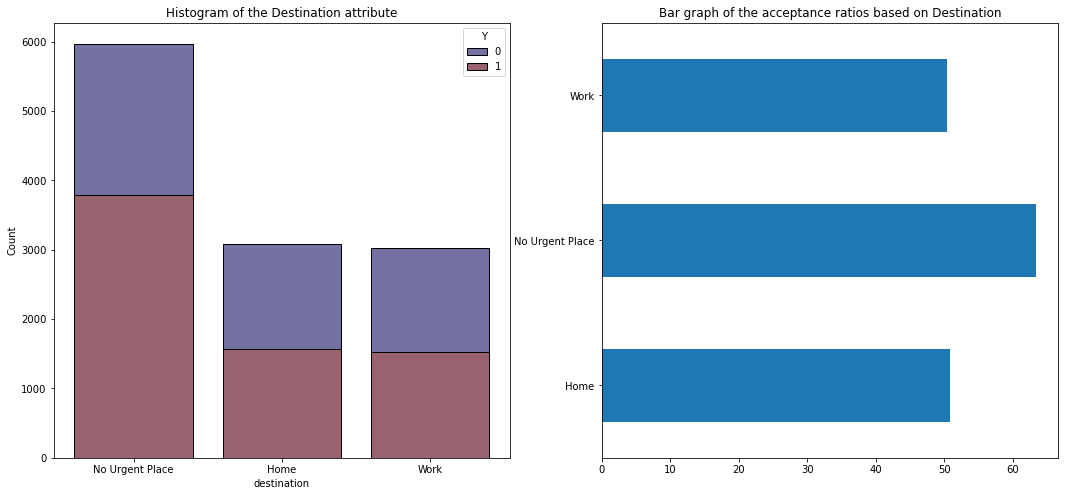

In [141]:
#Calculating the acceptance ratio for various Destinations
Accepted_destination = pd.crosstab(data_clean['destination'],data_clean['Y'])
total_destination = data_clean['destination'].value_counts()
ratio_destination = round((Accepted_destination[1]/total_destination)*100,2)

#Plotting the histogram & the coupon acceptance rate based on Passenger seat.
plt.figure(figsize=(18,8))
plt.subplot(121)
plt.title('Histogram of the Destination attribute')
sns.histplot(data=data_clean,x='destination',stat='count',hue='Y',multiple='stack',palette='icefire',shrink = 0.8)
plt.subplot(122)
plt.title('Bar graph of the acceptance ratios based on Destination')
ratio_destination.plot.barh();

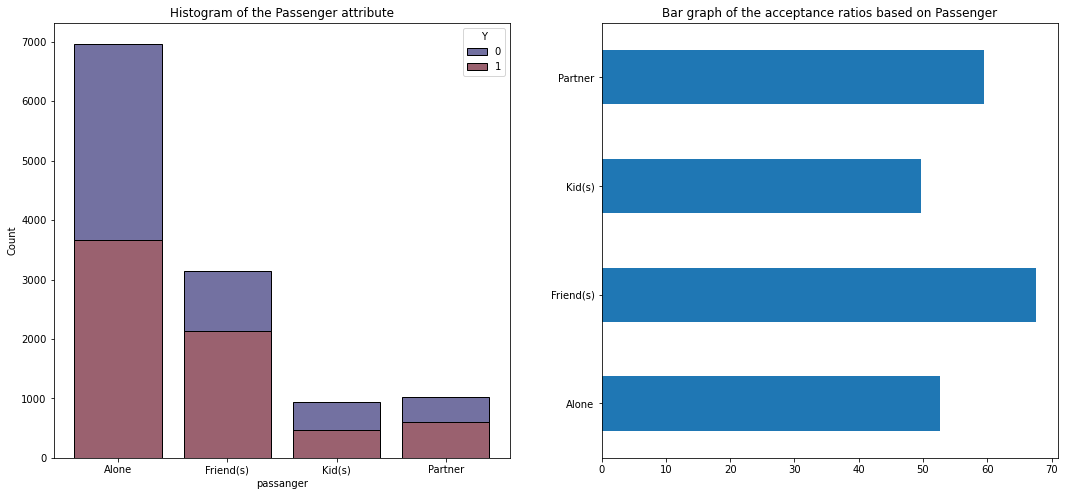

In [142]:
#Calculating the acceptance ratio
Accepted = pd.crosstab(data_clean['passanger'],data_clean['Y'])
total = data_clean['passanger'].value_counts()
ratio = round((Accepted[1]/total)*100,2)

#Plotting the histogram & the coupon acceptance rate based on Passenger seat.
plt.figure(figsize=(18,8))
plt.subplot(121)
plt.title('Histogram of the Passenger attribute')
sns.histplot(data=data_clean,x='passanger',stat='count',hue='Y',multiple='stack',palette='icefire',shrink = 0.8)
plt.subplot(122)
plt.title('Bar graph of the acceptance ratios based on Passenger')
ratio.plot.barh();

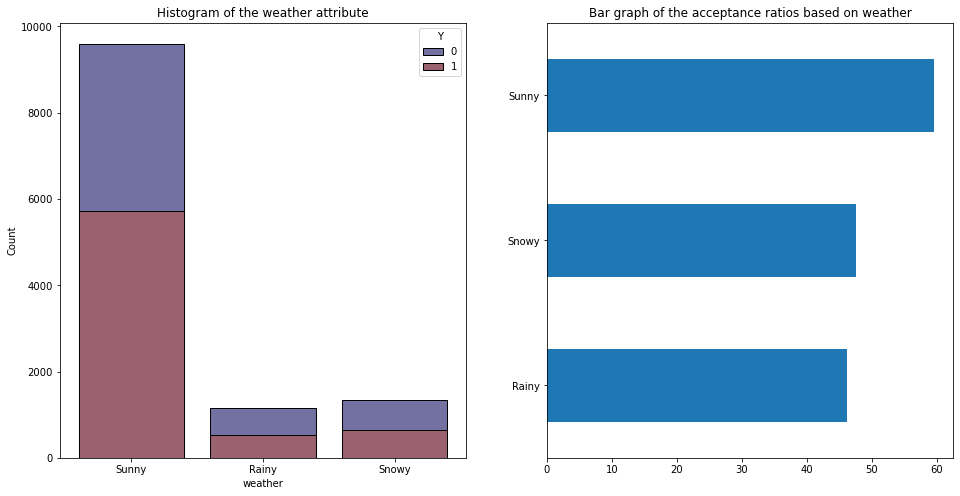

In [143]:
#Calculating the acceptance ratio
Accepted_weather = pd.crosstab(data_clean['weather'],data_clean['Y'])
total_weather = data_clean['weather'].value_counts()
ratio_weather = round((Accepted_weather[1]/total_weather)*100,2)

#Plotting the histogram & the coupon acceptance rate based on weather
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.title('Histogram of the weather attribute')
sns.histplot(data=data_clean,x='weather',stat='count',hue='Y',multiple='stack',palette='icefire',shrink = 0.8)
plt.subplot(122)
plt.title('Bar graph of the acceptance ratios based on weather')
ratio_weather.plot.barh();

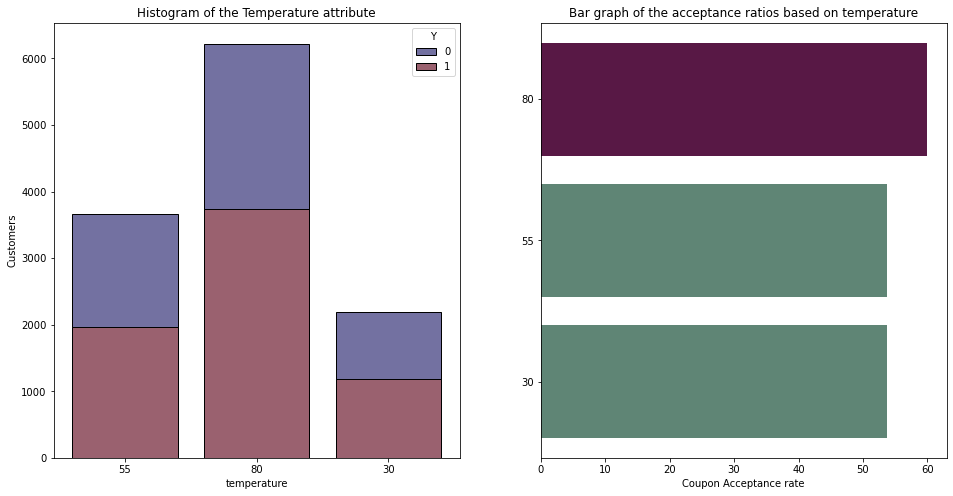

In [144]:
#Calculating the acceptance rate
Accepted = pd.crosstab(data_clean['temperature'],data_clean['Y'])
total = data_clean['temperature'].value_counts()
ratio = round((Accepted[1]/total)*100,2)

#Plotting the histogram & the coupon acceptance rate
plt.figure(figsize=(16,8))

#Plot 1 
plt.subplot(121)
plt.ylabel("Customers")
plt.title('Histogram of the Temperature attribute')
sns.histplot(data=data_clean,x='temperature',stat='count',hue='Y',multiple='stack',palette='icefire',shrink = 0.8)

#Plot 2
plt.subplot(122)
plt.title('Bar graph of the acceptance ratios based on temperature')

#Applying a mask to the category with highest acceptance rate
max_mask = max(ratio)
plt.xlabel("Coupon Acceptance rate")
plt.barh(ratio.index,ratio,color='#5F8575')
plt.barh(ratio.idxmax(),ratio.max(),color='#581845');

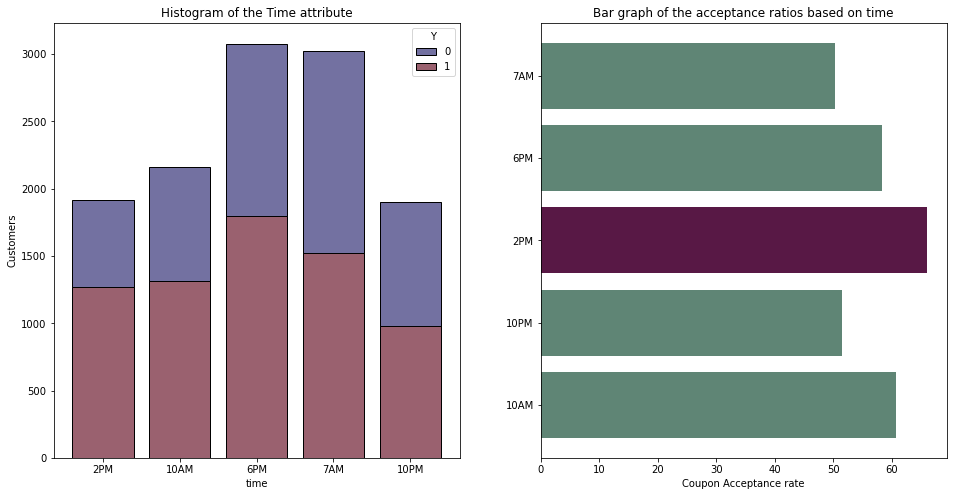

In [145]:
#Calculating the acceptance ratio
Accepted = pd.crosstab(data_clean['time'],data_clean['Y'])
total = data_clean['time'].value_counts()
ratio = round((Accepted[1]/total)*100,2)

#Plotting the histogram & the coupon acceptance rate based on temperature seat.
plt.figure(figsize=(16,8))

#Plot 1 
plt.subplot(121)
plt.ylabel("Customers")
plt.title('Histogram of the Time attribute')
sns.histplot(data=data_clean,x='time',stat='count',hue='Y',multiple='stack',palette='icefire',shrink = 0.8)

#Plot 2
plt.subplot(122)
plt.title('Bar graph of the acceptance ratios based on time')

#Applying a mask to the category with highest acceptance rate
max_mask = max(ratio)
plt.xlabel("Coupon Acceptance rate")
plt.barh(ratio.index,ratio,color='#5F8575')
plt.barh(ratio.idxmax(),ratio.max(),color='#581845');

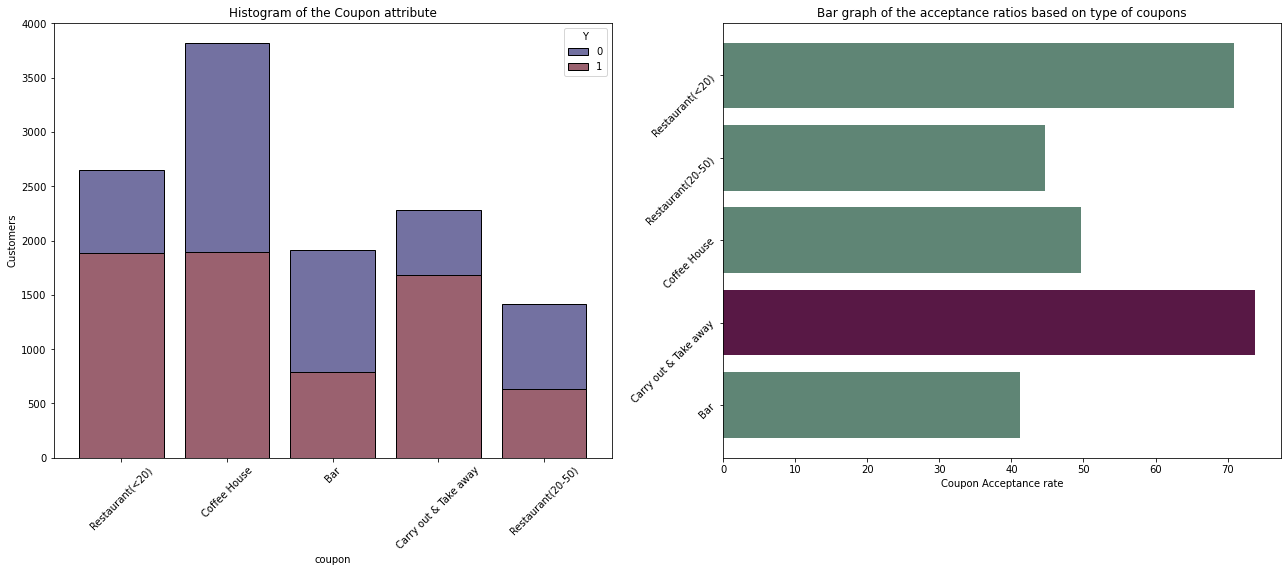

In [146]:
#Calculating the acceptance ratio
Accepted = pd.crosstab(data_clean['coupon'],data_clean['Y'])
total = data_clean['coupon'].value_counts()
ratio = round((Accepted[1]/total)*100,2)

#Plotting the histogram & the coupon acceptance rate based on temperature seat.
plt.figure(figsize=(22,8))

#Plot 1 
plt.subplot(121)
plt.ylabel("Customers")
plt.title('Histogram of the Coupon attribute')
plt.xticks(rotation='45')
sns.histplot(data=data_clean,x='coupon',stat='count',hue='Y',multiple='stack',palette='icefire',shrink = 0.8)

#Plot 2
plt.subplot(122)
plt.title('Bar graph of the acceptance ratios based on type of coupons')
plt.yticks(rotation='45')


#Applying a mask to the category with highest acceptance rate
max_mask = max(ratio)
plt.xlabel("Coupon Acceptance rate")
plt.barh(ratio.index,ratio,color='#5F8575')
plt.barh(ratio.idxmax(),ratio.max(),color='#581845');

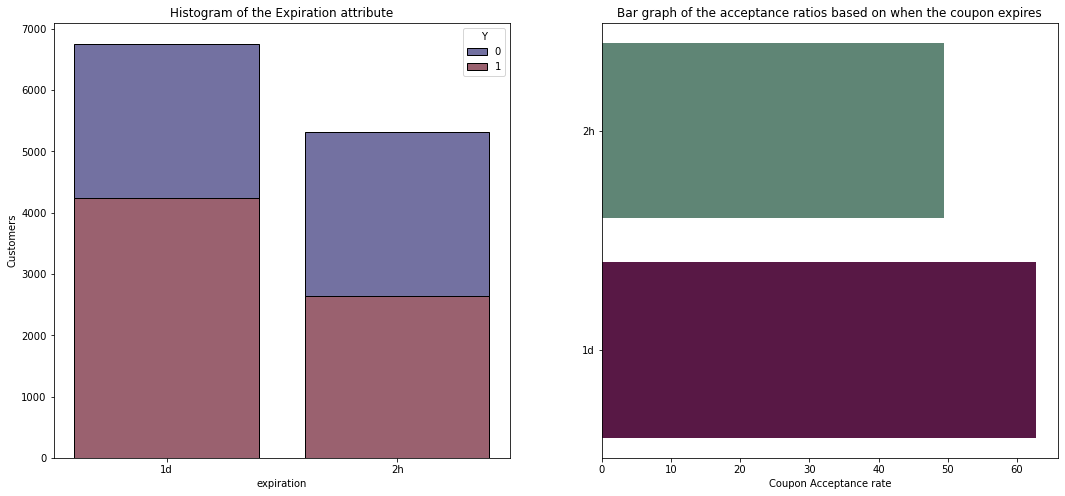

In [147]:
#Calculating the acceptance ratio
Accepted = pd.crosstab(data_clean['expiration'],data_clean['Y'])
total = data_clean['expiration'].value_counts()
ratio = round((Accepted[1]/total)*100,2)

#Plotting the histogram & the coupon acceptance rate based on temperature seat.
plt.figure(figsize=(18,8))

#Plot 1 
plt.subplot(121)
plt.ylabel("Customers")
plt.title('Histogram of the Expiration attribute')
sns.histplot(data=data_clean,x='expiration',stat='count',hue='Y',multiple='stack',palette='icefire',shrink = 0.8)

#Plot 2
plt.subplot(122)
plt.title('Bar graph of the acceptance ratios based on when the coupon expires')

#Applying a mask to the category with highest acceptance rate
max_mask = max(ratio)
plt.xlabel("Coupon Acceptance rate")
plt.barh(ratio.index,ratio,color='#5F8575')
plt.barh(ratio.idxmax(),ratio.max(),color='#581845');

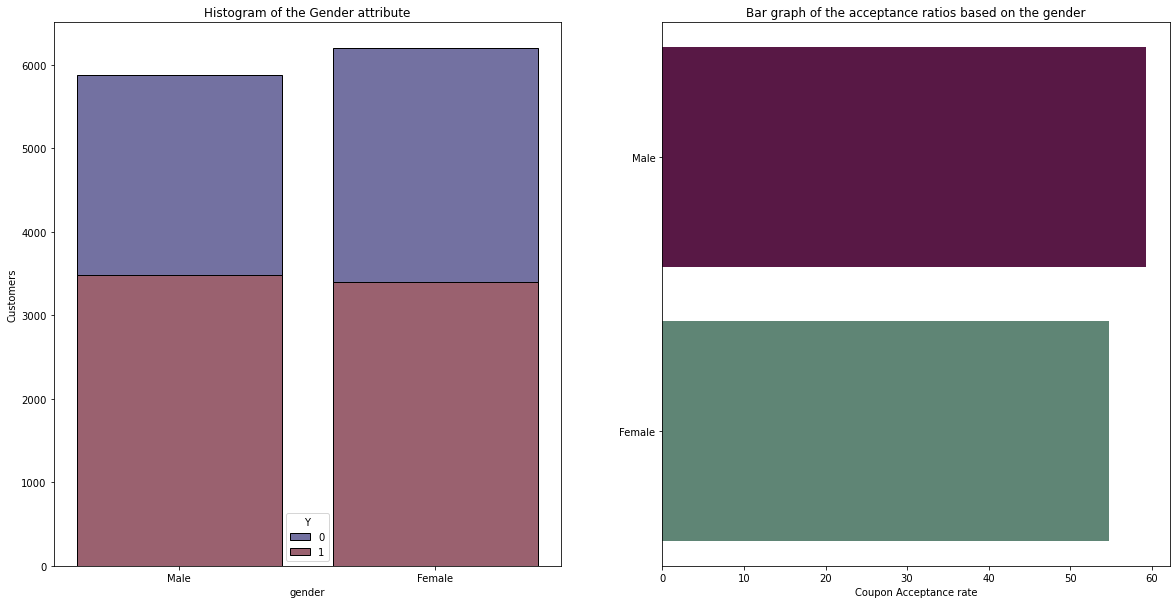

In [148]:
#Calculating the acceptance ratio
Accepted = pd.crosstab(data_clean['gender'],data_clean['Y'])
total = data_clean['gender'].value_counts()
ratio = round((Accepted[1]/total)*100,2)

#Plotting the histogram & the coupon acceptance rate based on temperature seat.
plt.figure(figsize=(20,10))

#Plot 1 
plt.subplot(121)
plt.ylabel("Customers")
plt.title('Histogram of the Gender attribute')
sns.histplot(data=data_clean,x='gender',stat='count',hue='Y',multiple='stack',palette='icefire',shrink = 0.8)

#Plot 2
plt.subplot(122)
plt.title('Bar graph of the acceptance ratios based on the gender')

#Applying a mask to the category with highest acceptance rate
max_mask = max(ratio)
plt.xlabel("Coupon Acceptance rate")
plt.barh(ratio.index,ratio,color='#5F8575')
plt.barh(ratio.idxmax(),ratio.max(),color='#581845');

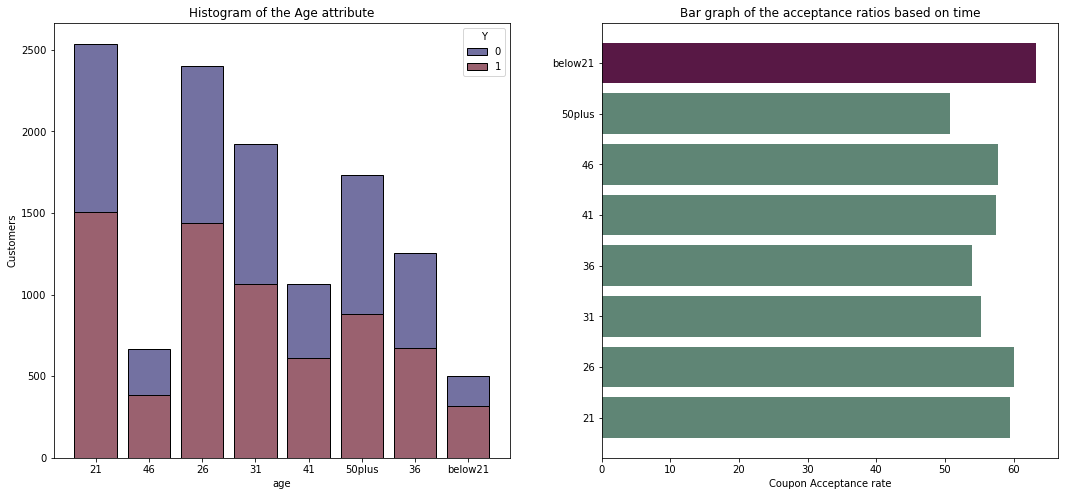

In [149]:
#Calculating the acceptance ratio
Accepted = pd.crosstab(data_clean['age'],data_clean['Y'])
total = data_clean['age'].value_counts()
ratio = round((Accepted[1]/total)*100,2)

#Plotting the histogram & the coupon acceptance rate based on temperature seat.
plt.figure(figsize=(18,8))

#Plot 1 
plt.subplot(121)
plt.ylabel("Customers")
plt.title('Histogram of the Age attribute')
sns.histplot(data=data_clean,x='age',stat='count',hue='Y',multiple='stack',palette='icefire',shrink = 0.8)

#Plot 2
plt.subplot(122)
plt.title('Bar graph of the acceptance ratios based on time')

#Applying a mask to the category with highest acceptance rate
max_mask = max(ratio)
plt.xlabel("Coupon Acceptance rate")
plt.barh(ratio.index,ratio,color='#5F8575')
plt.barh(ratio.idxmax(),ratio.max(),color='#581845');

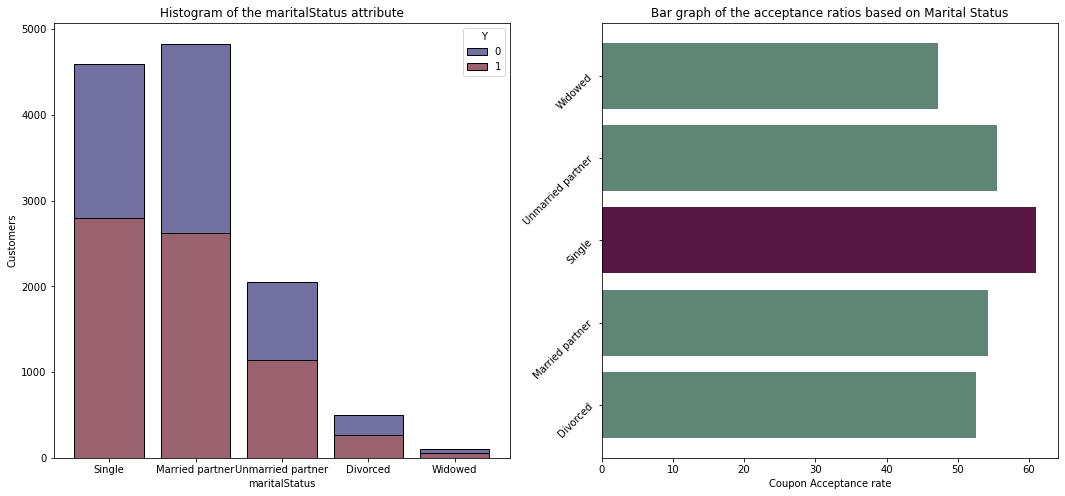

In [150]:
#Calculating the acceptance ratio
Accepted = pd.crosstab(data_clean['maritalStatus'],data_clean['Y'])
total = data_clean['maritalStatus'].value_counts()
ratio = round((Accepted[1]/total)*100,2)

#Plotting the histogram & the coupon acceptance rate based on temperature seat.
plt.figure(figsize=(18,8))

#Plot 1 
plt.subplot(121)
plt.ylabel("Customers")
plt.title('Histogram of the maritalStatus attribute')
sns.histplot(data=data_clean,x='maritalStatus',stat='count',hue='Y',multiple='stack',palette='icefire',shrink = 0.8)

#Plot 2
plt.subplot(122)
plt.title('Bar graph of the acceptance ratios based on Marital Status')
plt.yticks(rotation='45')


#Applying a mask to the category with highest acceptance rate
max_mask = max(ratio)
plt.xlabel("Coupon Acceptance rate")
plt.barh(ratio.index,ratio,color='#5F8575')
plt.barh(ratio.idxmax(),ratio.max(),color='#581845');

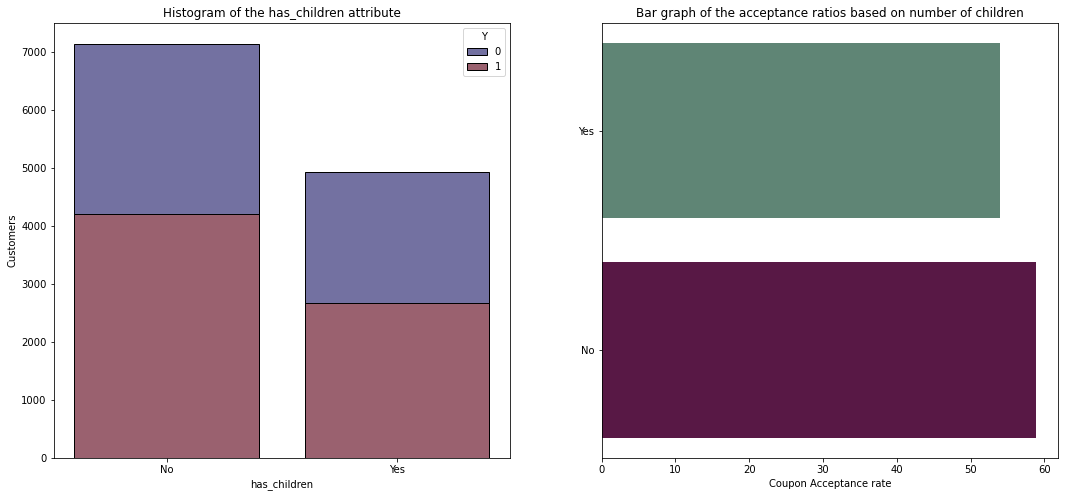

In [151]:
#Converting the 'has_children' numerical variable into a categorical variable
data_clean['has_children'] = data_clean['has_children'].replace({0:'No',1:'Yes'})

#Calculating the acceptance ratio
Accepted = pd.crosstab(data_clean['has_children'],data_clean['Y'])
total = data_clean['has_children'].value_counts()
ratio = round((Accepted[1]/total)*100,2)

#Plotting the histogram & the coupon acceptance rate based on temperature seat.
plt.figure(figsize=(18,8))

#Plot 1 
plt.subplot(121)
plt.ylabel("Customers")
plt.title('Histogram of the has_children attribute')
sns.histplot(data=data_clean,x='has_children',stat='count',hue='Y',multiple='stack',palette='icefire',shrink = 0.8)

#Plot 2
plt.subplot(122)
plt.title('Bar graph of the acceptance ratios based on number of children')

#Applying a mask to the category with highest acceptance rate
max_mask = max(ratio)
plt.xlabel("Coupon Acceptance rate")
plt.barh(ratio.index,ratio,color='#5F8575')
plt.barh(ratio.idxmax(),ratio.max(),color='#581845');

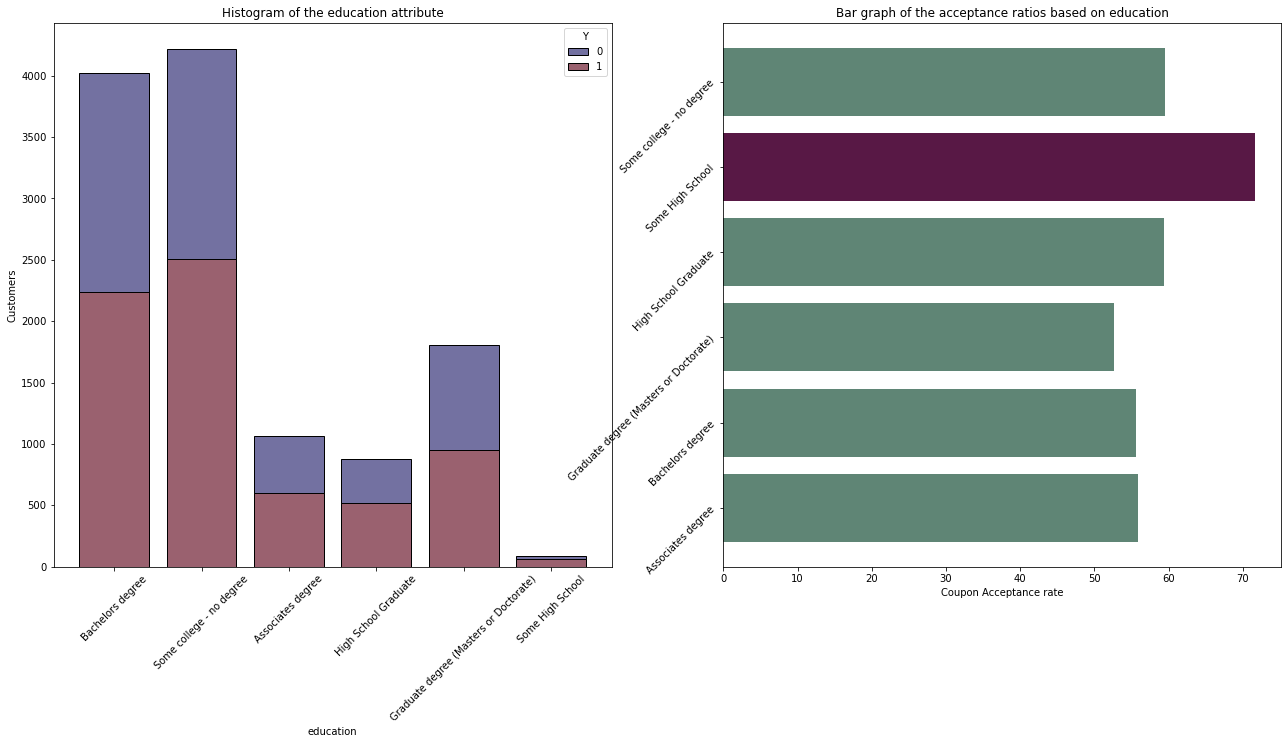

In [159]:
#Calculating the acceptance ratio
Accepted = pd.crosstab(data_clean['education'],data_clean['Y'])
total = data_clean['education'].value_counts()
ratio = round((Accepted[1]/total)*100,2)

#Plotting the histogram & the coupon acceptance rate based on temperature seat.
plt.figure(figsize=(22,10))

#Plot 1 
plt.subplot(121)
plt.ylabel("Customers")
plt.xticks(rotation='45')

plt.title('Histogram of the education attribute')
sns.histplot(data=data_clean,x='education',stat='count',hue='Y',multiple='stack',palette='icefire',shrink = 0.8)

#Plot 2
plt.subplot(122)
plt.title('Bar graph of the acceptance ratios based on education')

#Applying a mask to the category with highest acceptance rate
max_mask = max(ratio)
plt.xlabel("Coupon Acceptance rate")
plt.yticks(rotation='45')

plt.barh(ratio.index,ratio,color='#5F8575')
plt.barh(ratio.idxmax(),ratio.max(),color='#581845');

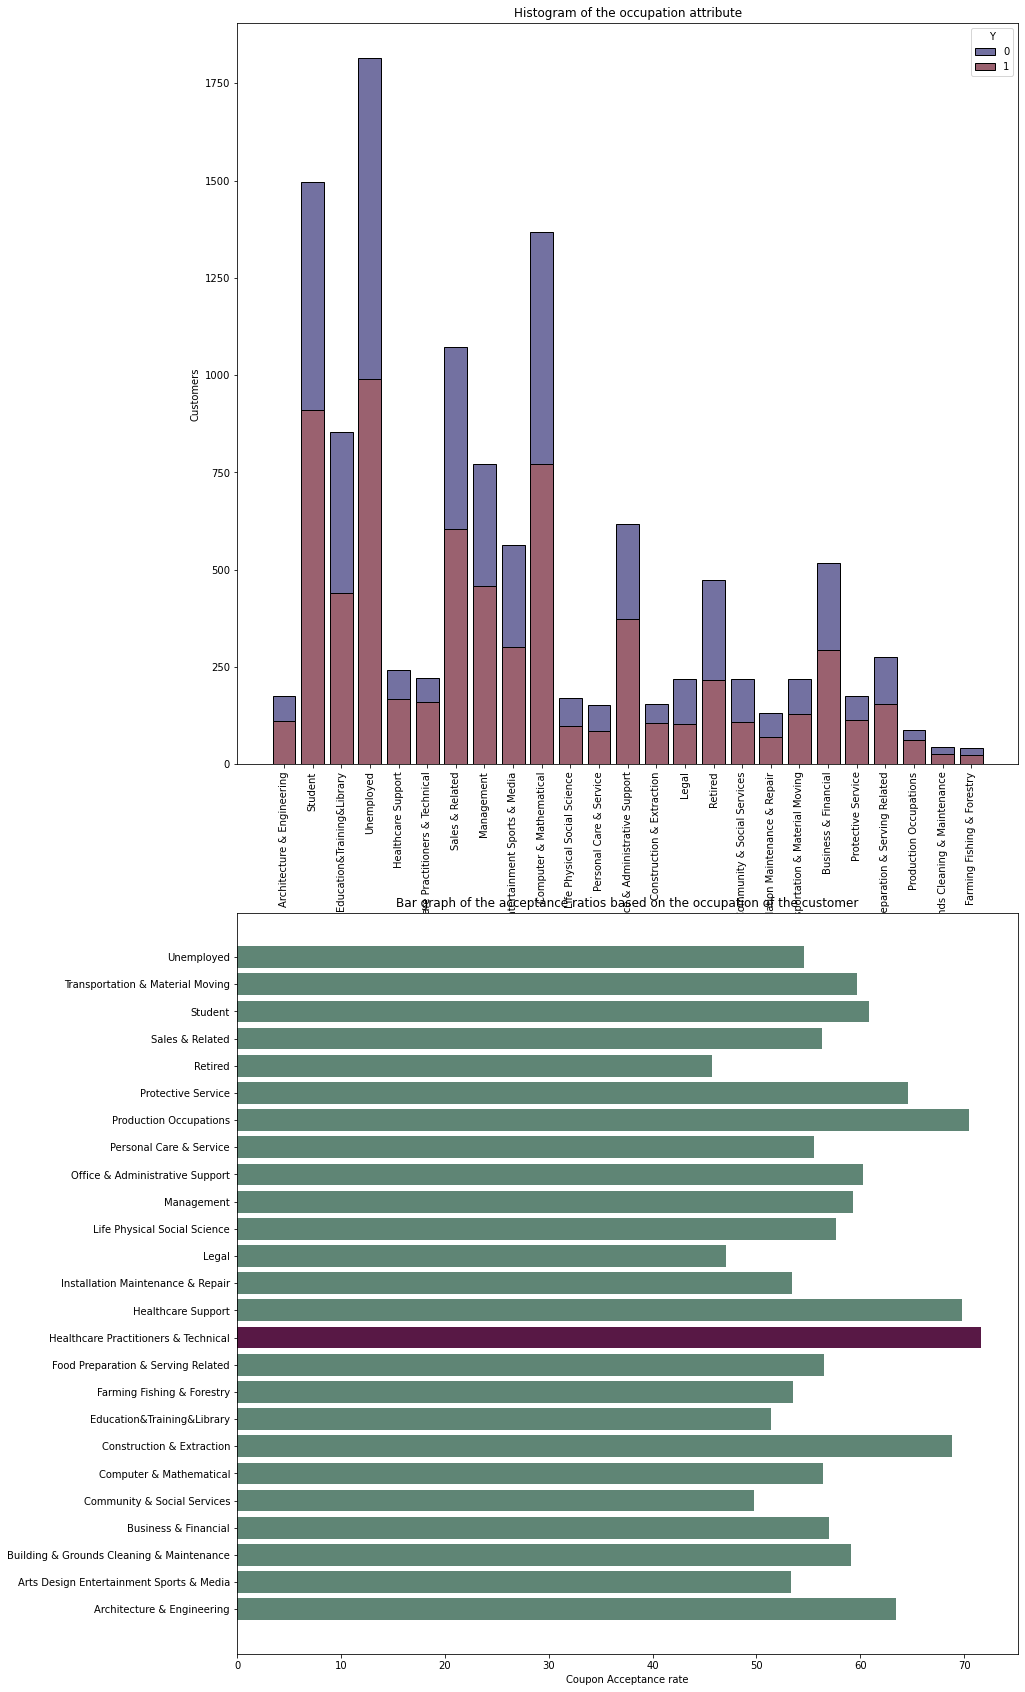

In [172]:
#Calculating the acceptance ratio
Accepted = pd.crosstab(data_clean['occupation'],data_clean['Y'])
total = data_clean['occupation'].value_counts()
ratio = round((Accepted[1]/total)*100,2)

#Plotting the histogram & the coupon acceptance rate based on temperature seat.
plt.figure(figsize=(14,30))

#Plot 1 
plt.subplot(211)
plt.ylabel("Customers")
plt.xticks(rotation=90)
plt.title('Histogram of the occupation attribute')
sns.histplot(data=data_clean,x='occupation',stat='count',hue='Y',multiple='stack',palette='icefire',shrink = 0.8)

#Plot 2
plt.subplot(212)
plt.title('Bar graph of the acceptance ratios based on the occupation of the customer')

#Applying a mask to the category with highest acceptance rate
max_mask = max(ratio)
plt.xlabel("Coupon Acceptance rate")
plt.barh(ratio.index,ratio,color='#5F8575')
plt.barh(ratio.idxmax(),ratio.max(),color='#581845');

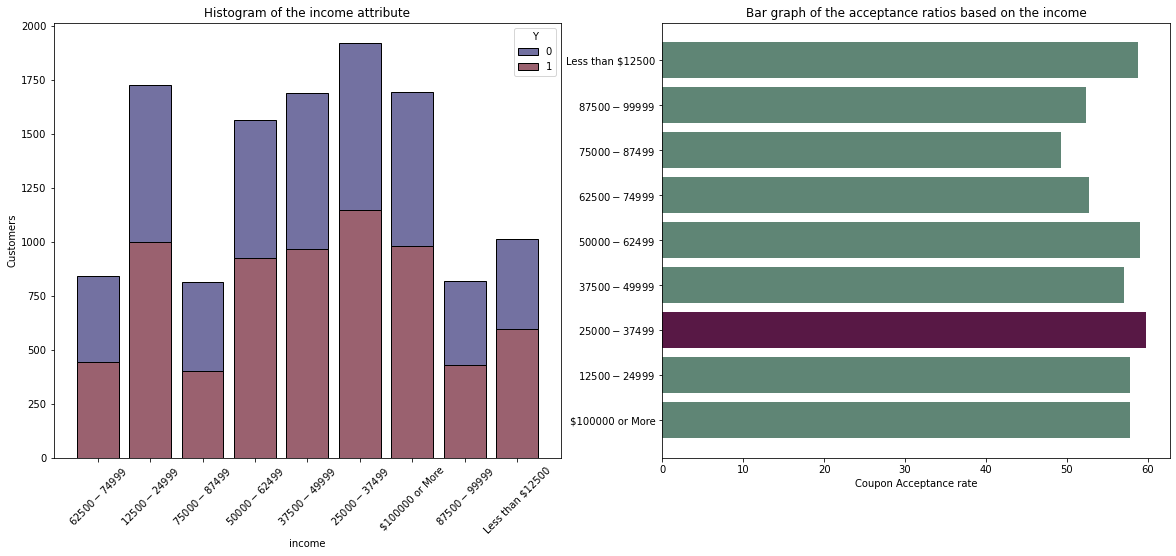

In [174]:
#Calculating the acceptance ratio
Accepted = pd.crosstab(data_clean['income'],data_clean['Y'])
total = data_clean['income'].value_counts()
ratio = round((Accepted[1]/total)*100,2)

#Plotting the histogram & the coupon acceptance rate based on temperature seat.
plt.figure(figsize=(20,8))

#Plot 1 
plt.subplot(121)
plt.ylabel("Customers")
plt.xticks(rotation=45)

plt.title('Histogram of the income attribute')
sns.histplot(data=data_clean,x='income',stat='count',hue='Y',multiple='stack',palette='icefire',shrink = 0.8)

#Plot 2
plt.subplot(122)
plt.title('Bar graph of the acceptance ratios based on the income')

#Applying a mask to the category with highest acceptance rate
max_mask = max(ratio)
plt.xlabel("Coupon Acceptance rate")
plt.barh(ratio.index,ratio,color='#5F8575')
plt.barh(ratio.idxmax(),ratio.max(),color='#581845');

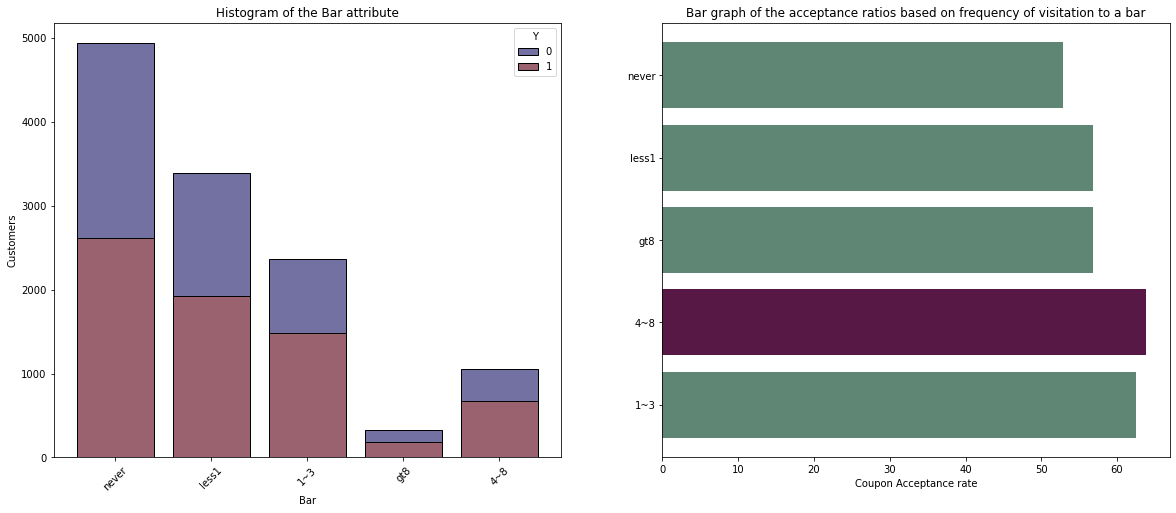

In [176]:
#Calculating the acceptance ratio
Accepted = pd.crosstab(data_clean['Bar'],data_clean['Y'])
total = data_clean['Bar'].value_counts()
ratio = round((Accepted[1]/total)*100,2)

#Plotting the histogram & the coupon acceptance rate based on temperature seat.
plt.figure(figsize=(20,8))

#Plot 1 
plt.subplot(121)
plt.ylabel("Customers")
plt.xticks(rotation=45)

plt.title('Histogram of the Bar attribute')
sns.histplot(data=data_clean,x='Bar',stat='count',hue='Y',multiple='stack',palette='icefire',shrink = 0.8)

#Plot 2
plt.subplot(122)
plt.title('Bar graph of the acceptance ratios based on frequency of visitation to a bar')

#Applying a mask to the category with highest acceptance rate
max_mask = max(ratio)
plt.xlabel("Coupon Acceptance rate")
plt.barh(ratio.index,ratio,color='#5F8575')
plt.barh(ratio.idxmax(),ratio.max(),color='#581845');